In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1 Загрузите файл HR.csv в pandas dataframe

In [2]:
hr_data = pd.read_csv('HR.csv')

In [ ]:
"""1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты"""

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [60]:
hr_data.shape

(14999, 10)

#### БАЗА: 14999 строк , 10 столбцов

In [36]:
hr_data.info()
"""
количественные - непрерывные: 
satisfaction_level Шкала: от 0 до 1
last_evaluation Шкала: от 0 до 1

количественные - дискретные: 
number_project мин= 2, макс = 7
average_montly_hours мин=96 макс=310
time_spend_company мин= 2, макс = 10

качественные - порядковые: 
Work_accident значения 0(нет) и 1 (да)
left значения 0(нет) и 1 (да)
promotion_last_5years значения 0(нет) и 1 (да)
salary значения : low medium high      

качественные - номинальные: 
department 10 названий департаментов
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [48]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [68]:
hr_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [69]:
hr_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

#### для качественных переменных вычисляем моду

In [52]:
print( 'Мода для Work_accident:' , hr_data['Work_accident'].mode()[0])
print( 'Мода для left:' , hr_data['left'].mode()[0])
print( 'Мода для promotion_last_5years:' , hr_data['promotion_last_5years'].mode()[0])
print( 'Мода для salary:' , hr_data['salary'].mode()[0])
print( 'Мода для department:' , hr_data['department'].mode()[0])

Мода для Work_accident: 0
Мода для left: 0
Мода для promotion_last_5years: 0
Мода для salary: low
Мода для department: sales


### 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

#### убираем качественные переменные из датасета, т.к. для них коэф корреляции Пирсона не показателен

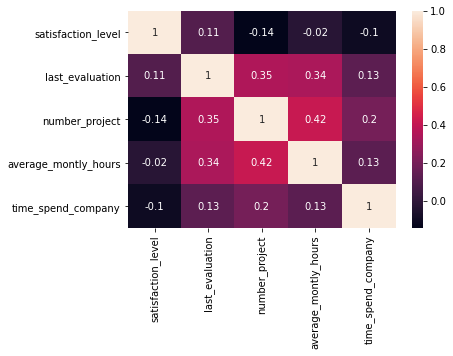

In [59]:
sns.heatmap(hr_data.drop(['Work_accident', 'left', 'promotion_last_5years', 'salary','department'], axis=1).corr(), annot = True)


#### самые скоррелированные переменные: number_projects и average_montly_hours. две наименее скоррелированные переменные: average_monthly_hours и satisfaction_level

#### Далее проверям, есть ли выбросы в этих переменных. При наличии выбросов коэф корреляции Пирсона использовать некорреткно. Выбросы обнаружены для переменной time_spend_company , для остальных -- выбросов нет.

#### satisfaction_level нет выбросов

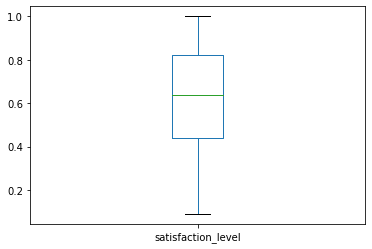

In [60]:
hr_data['satisfaction_level'].plot(kind='box')

#### last_evaluation нет выбросов

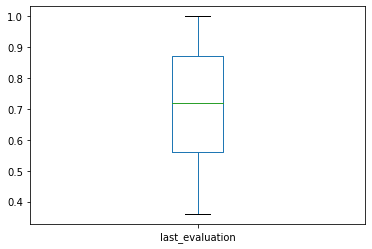

In [59]:
hr_data['last_evaluation'].plot(kind='box')

#### number_project нет выбросов

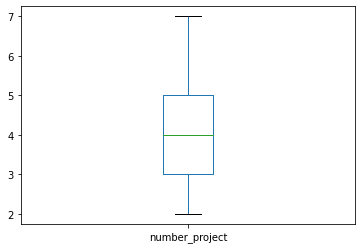

In [63]:
hr_data['number_project'].plot(kind='box')

#### average_montly_hours нет выбросов 

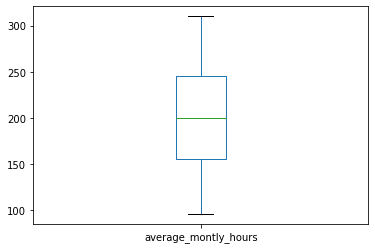

In [64]:
hr_data['average_montly_hours'].plot(kind='box')

#### time_spend_company есть выбросы. 

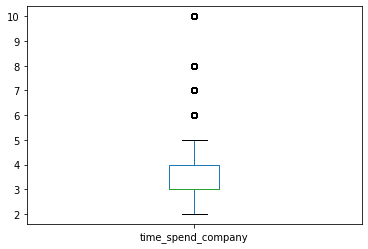

In [65]:
hr_data['time_spend_company'].plot(kind='box')

### 4 Рассчитайте сколько сотрудников работает в каждом департаменте

In [70]:

hr_data['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### 5 Показать распределение сотрудников по зарплатам.

#### распределение в числах

In [71]:

hr_data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#### распределение в долях

In [94]:
#тоже самое в долях
hr_data['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

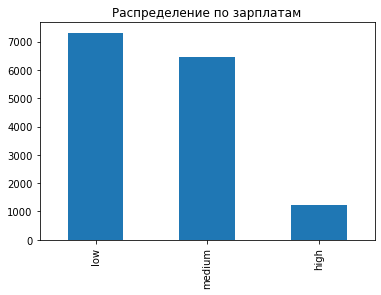

In [22]:
hr_data['salary'].value_counts().plot.bar(title = 'Распределение по зарплатам')

### 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

#### распределение в числах

In [25]:

hr_data.groupby('department')['salary'].value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

#### распределение в долях

In [93]:

hr_data.groupby('department')['salary'].value_counts(normalize=True)

department   salary
IT           low       0.496333
             medium    0.436023
             high      0.067645
RandD        medium    0.472681
             low       0.462516
             high      0.064803
accounting   low       0.466754
             medium    0.436767
             high      0.096480
hr           medium    0.485792
             low       0.453315
             high      0.060893
management   high      0.357143
             medium    0.357143
             low       0.285714
marketing    low       0.468531
             medium    0.438228
             high      0.093240
product_mng  low       0.500000
             medium    0.424612
             high      0.075388
sales        low       0.507005
             medium    0.428019
             high      0.064976
support      low       0.514132
             medium    0.422611
             high      0.063257
technical    low       0.504412
             medium    0.421691
             high      0.073897
Name: salary, dtype:

### 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

#### Гипотеза H_0 = сотрудники с высокой и с низкой зарплатой проводят одинаковое время на работе

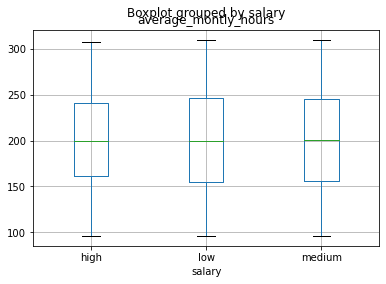

In [56]:
import  scipy.stats as stats

sign_level= 0.05

hr_data.boxplot(column='average_montly_hours', by = 'salary')



#### визуально среднее время на работе не различается в зависимости от оклада

#### функция вывода результата критерия:

In [61]:
def print_res (p, sign_level):
    if p < sign_level: print(f'гипотеза H_0 отвергается. Оклады различаются, на уровне значимости {sign_level}')
    else: print(f'гипотеза H_0 не отвергается. Оклады совпадают, на уровне значимости {sign_level}')

In [42]:
df1 = hr_data[hr_data.salary =='high'] 
df2 = hr_data[hr_data.salary =='low'] 

#### Т-критерий Стьюдента. Сравнение двух выборочных средних при неизвестных равных дисперсиях. Проверяем условие, что обе выборки (с высоким окладом и с низким) нормальные


salary
high      AxesSubplot(0.125,0.125;0.775x0.755)
low       AxesSubplot(0.125,0.125;0.775x0.755)
medium    AxesSubplot(0.125,0.125;0.775x0.755)
Name: average_montly_hours, dtype: object

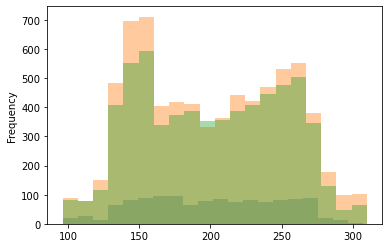

In [45]:

hr_data.groupby('salary')['average_montly_hours'].plot(kind='hist', bins=20, alpha=0.4)


#### Распределение не похоже на нормальное. Расcчитаем t-статистику, но лучше принять решение по непараметрическому методу

In [43]:
stat_t , p_t = stats.ttest_ind(df1['average_montly_hours'], df2['average_montly_hours'])
print(stat_t , p_t)
print('Т-критерий')

print_res(p_t, sign_level)

-0.7288680398062308 0.4661023478267259
Т-критерий
гипотеза H_0 не отвергается. Оклады совпадают, на уровне значимости 0.05


#### Так как наши выборки независимы и не распределены нормально, оптимальнее всег использовать U-критерий Манна — Уитни. критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественн

In [62]:
from scipy.stats import mannwhitneyu

stat_mu , p_mu = stats.mannwhitneyu(df1['average_montly_hours'], df2['average_montly_hours'])
print(stat_mu , p_mu)
print('Манна — Уитни')

print_res(p_mu, sign_level)

4507096.5 0.4120665360429347
Манна — Уитни
гипотеза H_0 не отвергается. Оклады совпадают, на уровне значимости 0.05


### 8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

#### Доля сотрудников с повышением за последние 5 лет:

In [46]:
hr_data.groupby('left')['promotion_last_5years'].mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

#### Cреди не уволившихся доля сотрудников с повышением 2,6% против 0,5% среди уволившихся

#### Средняя степень удовлетворенности:

In [63]:
hr_data.groupby('left')['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

#### среди не уволившихся средняя удовлетворенность 66,6% против 44,0% среди уволившихся

#### Среднее количество проектов:

In [48]:
hr_data.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

#### среднее колво проектов почти не различается

### 9 Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

#### проверяем насколько редкое событие = 1 . Видим, что данные сбалансированные.

In [65]:
hr_data['left'].value_counts(normalize=True)


0    0.761917
1    0.238083
Name: left, dtype: float64

#### строим модель LDA

In [50]:
#убираем department и salary из факторов
x=hr_data.drop([ 'salary','department'], axis=1)
y=hr_data['left']

#Разделяем данные на тестовую и обучающую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train )
lda.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Оцениваем качество модели на тестовой выборки по показателю точности = доля правильно спрогнозированных

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.7557777777777778

#### точность модели LDA = 75,5%

In [ ]:
#10 Загрузить jupyter notebook с решение на github и прислать ссылку
-------------
-------------
-------------